In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.dtypes

Day      datetime64[ns]
Time             object
Bio              object
Dust             object
T               float64
H               float64
PM2.5           float64
dtype: object

In [6]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [7]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [8]:
#df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
#df = df.resample('H', on='Date_Time').sum()
#df=df.reset_index()
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9

In [9]:
df

,Day,Time,Bio,Dust,T,H,PM2.5,Date_Time
1,2022-05-01,00:03:29,11,34254,25.5,27.0,30.984,1651363409
2,2022-05-01,00:07:36,19,33980,25.5,27.0,30.750,1651363656
3,2022-05-01,00:11:43,28,33378,25.5,27.0,30.235,1651363903
4,2022-05-01,00:15:50,47,33092,25.5,27.0,29.990,1651364150
5,2022-05-01,00:19:57,7,32859,25.5,27.0,29.790,1651364397
...,...,...,...,...,...,...,...,...
63637,2022-11-20,07:53:02,487,53460,21.0,33.0,46.991,1668930782
63638,2022-11-20,07:57:08,578,53567,21.0,33.0,47.079,1668931028
63639,2022-11-20,08:01:14,424,51910,21.0,33.0,45.726,1668931274
63640,2022-11-20,08:05:20,596,52928,21.0,33.0,46.558,1668931520


In [10]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

In [11]:
df.drop(['Day','Time'],axis=1,inplace=True)

In [12]:
X=df.drop('PM2.5',axis=1)
Y=df['PM2.5']

In [ ]:
X=minmax_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
y_test.shape

In [ ]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.8032278656876993
--------------------------------------------------
Mean absolute error (MAE) :  0.4874035760089904
--------------------------------------------------
R2 score :  0.9987304565082075
--------------------------------------------------
Willmott's Index: 97.19224339240691
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.9987304565082075


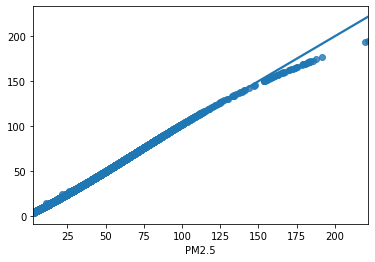

							-----------------------------------------------------------
							 Time for detection (Ridge) : 2.839 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.8007350111003287
--------------------------------------------------
Mean absolute error (MAE) :  0.48656336113370413
--------------------------------------------------
R2 score :  0.9987383244530856
--------------------------------------------------
Willmott's Index: 97.19708356794932
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.9987383244530856


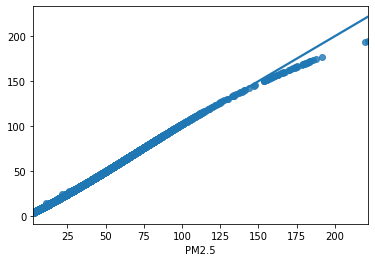

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.295 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.9989109164614386
--------------------------------------------------
Mean absolute error (MAE) :  0.4516581358808372
--------------------------------------------------
R2 score :  0.9980365331708688
--------------------------------------------------
Willmott's Index: 97.39816000986991
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.9980365331708688


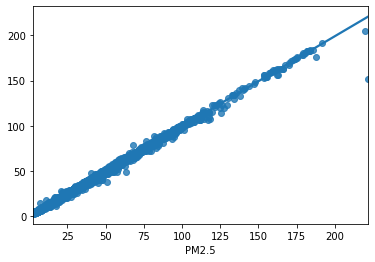

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 2.492 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.1130636481253844
--------------------------------------------------
Mean absolute error (MAE) :  0.003447171139463549
--------------------------------------------------
R2 score :  0.9999748454797505
--------------------------------------------------
Willmott's Index: 99.98014208754152
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.9999748454797505


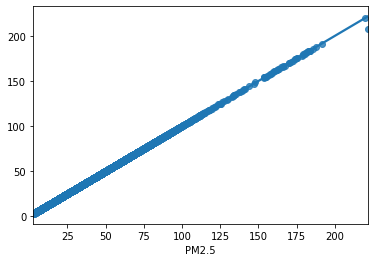

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 20.04 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.2625710879079055
--------------------------------------------------
Mean absolute error (MAE) :  0.006576393689900133
--------------------------------------------------
R2 score :  0.99986433623761
--------------------------------------------------
Willmott's Index: 99.96211576248959
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.99986433623761


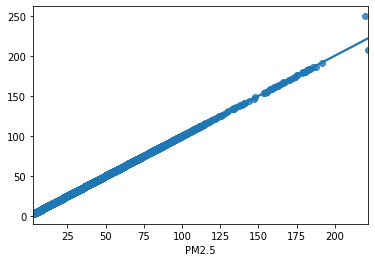

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 1.625 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.8318265903461877
--------------------------------------------------
Mean absolute error (MAE) :  0.4983770171451175
--------------------------------------------------
R2 score :  0.9986384435617145
--------------------------------------------------
Willmott's Index: 97.1290293468509
--------------------------------------------------
Nash-Sutcliffe efficiency (NSE): 0.9986384435617145


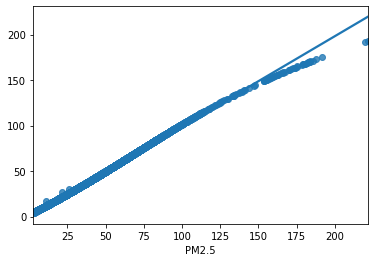

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 1.878 seconds...
							-----------------------------------------------------------



,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index,Nash-Sutcliffe efficiency (NSE)
0,0.998883,0.998730,0.487404,0.803228,0.998730,97.192243,0.998730
1,0.998886,0.998738,0.486563,0.800735,0.998738,97.197084,0.998738
2,0.998726,0.998037,0.451658,0.998911,0.998037,97.398160,0.998037
3,0.999984,0.999975,0.003447,0.113064,0.999975,99.980142,0.999975
4,1.000000,0.999864,0.006576,0.262571,0.999864,99.962116,0.999864
5,0.998806,0.998638,0.498377,0.831827,0.998638,97.129029,0.998638


In [19]:
# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDRegressor
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
#models.append(('Gaussian NB', BernoulliNB()))
models.append(('SGD Regressor', SGDRegressor()))
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
nse_l=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    
    
    



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    nse = nash_sutcliffe_efficiency(y_test, predictions)
    print(f"Nash-Sutcliffe efficiency (NSE): {nse}")
    nse_l.append(nse)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
comp = pd.DataFrame({"Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l, "R2 Score": r2_l,
                    "Willmot Index": wi_l,
                    "Nash-Sutcliffe efficiency (NSE)":nse_l})
comp

(3660, 5)

In [20]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
train_data.shape

(47730, 5, 1)

In [22]:
train_labels=y_train
test_labels=y_test

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [24]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))  # Output layer with single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
#model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
#loss = model.evaluate(test_data, test_labels)
#print('Test Loss:', loss)

# Make predictions
#predictions = model.predict(test_data)



Epoch 1/50
1492/1492 [==============================] - 28s 13ms/step - loss: 611.3555 - val_loss: 520.2394
Epoch 2/50
1492/1492 [==============================] - 19s 13ms/step - loss: 519.7622 - val_loss: 519.7694
Epoch 3/50
1492/1492 [==============================] - 19s 13ms/step - loss: 519.4790 - val_loss: 519.4117
Epoch 4/50
1492/1492 [==============================] - 19s 12ms/step - loss: 519.4275 - val_loss: 519.4622
Epoch 5/50
1492/1492 [==============================] - 18s 12ms/step - loss: 519.3065 - val_loss: 519.1920
Epoch 6/50
1492/1492 [==============================] - 18s 12ms/step - loss: 519.2493 - val_loss: 519.1257
Epoch 7/50
1492/1492 [==============================] - 20s 13ms/step - loss: 519.1285 - val_loss: 519.0731
Epoch 8/50
1492/1492 [==============================] - 18s 12ms/step - loss: 518.6638 - val_loss: 515.7906
Epoch 9/50
1492/1492 [==============================] - 19s 13ms/step - loss: 452.4042 - val_loss: 400.6554
Epoch 10/50
1492/1492 [=====

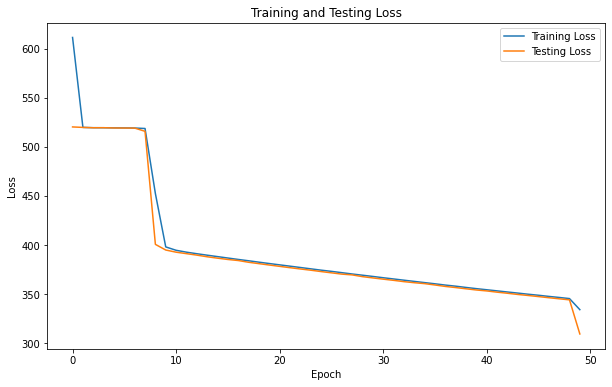

In [25]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Epoch 1/50
1492/1492 [==============================] - 20s 11ms/step - loss: 186.6326 - val_loss: 37.9622
Epoch 2/50
1492/1492 [==============================] - 16s 11ms/step - loss: 24.9376 - val_loss: 15.2317
Epoch 3/50
1492/1492 [==============================] - 16s 11ms/step - loss: 10.9207 - val_loss: 9.5474
Epoch 4/50
1492/1492 [==============================] - 17s 11ms/step - loss: 1.9984 - val_loss: 0.8485
Epoch 5/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.9193 - val_loss: 2.3821
Epoch 6/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.7772 - val_loss: 0.5987
Epoch 7/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.6616 - val_loss: 0.2933
Epoch 8/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.6265 - val_loss: 0.2271
Epoch 9/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.4927 - val_loss: 0.3739
Epoch 10/50
1492/1492 [==============================] - 1

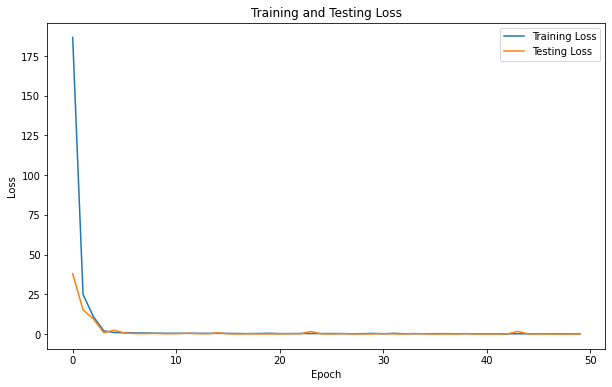

In [26]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and record training history
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()